Test that convex approximation of the energy is always hypograph of the actual energy function

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import polyphase as phase
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pdb

In [13]:
# f = phase.polynomial_energy

#f = lambda x : phase.flory_huggins(x, [5,5,1],[1,0.5,0.5])

f = lambda x : phase.flory_huggins(x, [1626, 12.4, 1],[0.44,1.48,1.9])
# Acetone	PC61BM	MDMO-PPV

# def f(x):    
#     scales = [10,20,400]
#     e =0
#     for si,xi in zip(scales, x):
#         e += si*((xi-0.1)**2)*((0.9-xi)**2)

#     return e

In [14]:
engine = phase.PHASE(f,100,3)
engine.compute(use_parallel=False, verbose=True, lift_label=True)

3-dimensional grid generated at 0.04s
Energy computed at 0.21s
Making energy manifold a paraboloid with 2x padding of 0.12 maximum energy
Energy is corrected at 0.33s
Convexhull is computed at 0.33s
Using 1.43E-01 as a threshold for Laplacian of a simplex
Simplices are refined at 0.33s
Total of 23 simplices in the convex hull
Simplices are labelled at 0.34s
Labels are lifted at 0.35s
Total 0/23 coplanar simplices
Computation took 0.35s


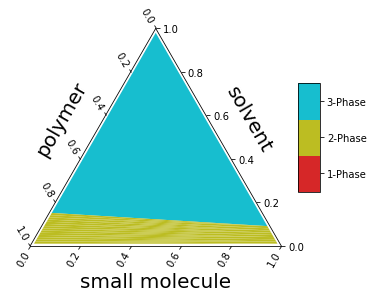

In [15]:
phase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps)
plt.show()

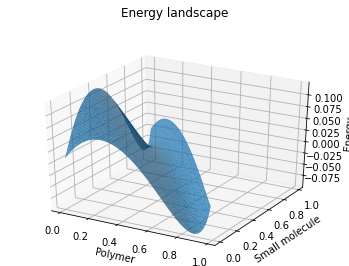

In [16]:
fig,ax = plt.subplots(subplot_kw={'projection':'3d'})
phase.plot_energy_landscape(engine.as_dict(), mode='full', ax = ax)
plt.show()

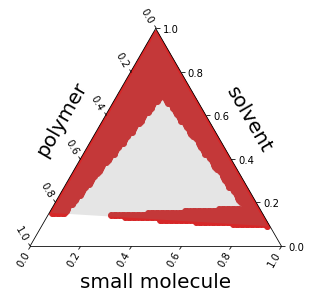

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection':'ternary'})
phase_simplices_ids = np.where(np.asarray(engine.num_comps)==3)[0]
num_pass, num_fail = 0,0
for simplex_id in phase_simplices_ids:
    test = phase.TestPhaseSplits(engine,phase=3,simplex_id=simplex_id, threshold=0.05)
    test.run()
    num_fail += len(test.non_matching_splits_)
    num_pass += len(test.matching_splits_)
    if not test.run():
        test.visualize(ax, show=False)
        #print(test.non_matching_splits_)
plt.show()
print('{} compositions failed the test; {} passed'.format(num_fail, num_pass))

In [18]:
for _ in range(10):
    test = phase.TestEpiGraph(engine.as_dict(),f,phase=2,**engine.get_kwargs())
    
    if test.is_epigraph():
        print('{} simplex PASSES epigraph test'.format(test.rnd_simplex))
    else:
        print('{} simplex FAILS epigraph test'.format(test.rnd_simplex))

[ 184 4985  185] simplex PASSES epigraph test
[ 194 5036 5041] simplex PASSES epigraph test
[ 184 4985  185] simplex PASSES epigraph test
[ 187 5006  186] simplex PASSES epigraph test
[ 189  190 5015] simplex PASSES epigraph test
[ 194  195 5041] simplex PASSES epigraph test
[ 184 4985  185] simplex PASSES epigraph test
[ 188 5006 5015] simplex PASSES epigraph test
[ 192  191 5030] simplex PASSES epigraph test
[ 194  195 5041] simplex PASSES epigraph test
